<a href="https://colab.research.google.com/github/Thicabien2004/Plant-project/blob/main/flowering_period_predict_flowering_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!python --version


Python 3.11.13


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORT 69t DATASET

In [ ]:
# species_69t = pd.read_csv("/content/drive/MyDrive/PLANT RESEARCH/datasets/Copy of Rham-69t.subset.csv")

In [ ]:
# species_69t.columns

Index(['species', '"', '",', 'WA', 'Age', 'Ploidy', 'log.length', 'log.area',
       'log.turn', 'log.netd', 'log.spec', 'ORDER', 'species.1',
       'Rare (Yes/No)', 'EPBC', 'WA ', 'January', 'February', 'March', 'April',
       'May', 'June', 'July', 'August', 'September', 'October', 'November',
       'December', 'genus', 'Sum of Months', 'bio15', 'bio12', 'bio7', 'bio4',
       'AGE (Ma)', 'ploidy', 'Length (km)', 'Area (km2)', 'speciation',
       'Cluster', 'Category_Sum_Months'],
      dtype='object')

In [ ]:
# species_69t.drop(columns = ['"', '",','ORDER'], inplace = True )
# species_69t['species'] = species_69t['species'].str.split('_').str[0] +' ' + species_69t['species'].str.split('_').str[1]

In [ ]:
# species_69t

,species,WA,Age,Ploidy,log.length,log.area,log.turn,log.netd,log.spec,species.1,...,bio12,bio7,bio4,AGE (Ma),ploidy,Length (km),Area (km2),speciation,Cluster,Category_Sum_Months
0,Stenanthemum notiale,1,4.92,4,3.458940,5.700234,-1.057101,-1.061166,-1.059129,Stenanthemum notiale,...,499.0,21.75,389.963520,4.92,4,2877,501457,0.087271,0,NaN
1,Stenanthemum stipulosum,1,6.21,4,2.679428,5.030729,-1.075344,-1.079366,-1.077350,Stenanthemum stipulosum,...,405.0,24.20,434.121415,6.21,4,478,107332,0.083685,1,NaN
2,Spyridium cordatum,1,1.25,3,2.666518,4.388332,-0.698314,-0.703626,-0.700962,Spyridium cordatum,...,1051.0,20.80,354.209670,1.25,3,464,24453,0.199085,0,Group 3
3,Spyridium microcephalum,1,2.64,2,2.926342,4.972744,-0.894422,-0.899078,-0.896744,Spyridium microcephalum,...,1411.0,23.15,396.889270,2.64,2,844,93917,0.126840,3,Group 3
4,Pomaderris brevifolia,1,2.77,2,2.636488,4.197666,-0.999249,-1.003451,-1.001345,Pomaderris brevifolia,...,596.5,21.80,375.495040,2.77,2,433,15764,0.099691,0,Group 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Cryptandra mutila,1,7.90,2,2.956168,4.913215,-1.084234,-1.088237,-1.086230,Cryptandra mutila,...,379.5,22.40,414.948045,7.90,2,904,81887,0.081992,2,Group 1
65,Stenanthemum coronatum,1,4.08,3,2.397940,4.028164,-1.035359,-1.039490,-1.037420,Stenanthemum coronatum,...,385.0,24.70,458.913515,4.08,3,250,10670,0.091745,1,Group 1
66,Stenanthemum nanum,1,4.08,2,2.075547,3.663512,-1.035359,-1.039490,-1.037420,Stenanthemum nanum,...,598.0,26.00,498.946320,4.08,2,119,4608,0.091745,1,Group 1
67,Cryptandra inconspicua,1,4.02,2,2.243038,0.000000,-1.060971,-1.065006,-1.062984,Cryptandra inconspicua,...,431.5,24.60,443.365585,4.02,2,175,1,0.086500,1,Group 1


In [ ]:
species_87t = pd.read_csv("/content/drive/MyDrive/PLANT RESEARCH/datasets/Copy of Rham-WA-87t-Anova-input.csv")

In [ ]:
species_87t.columns

Index(['species', '"', '",', 'WA', 'Age', 'Ploidy', 'log.length', 'log.area',
       'log.turn', 'log.netd', 'log.spec', 'ORDER', 'species.1',
       'Rare (Yes/No)', 'EPBC', 'WA '],
      dtype='object')

In [ ]:
# species_69t.columns

In [ ]:
species_87t.drop(columns = ['"', '",','ORDER'], inplace = True)

In [ ]:
species_87t

,species,WA,Age,Ploidy,log.length,log.area,log.turn,log.netd,log.spec,species.1,Rare (Yes/No),EPBC,WA
0,Blackallia_nudiflora,1,13.04,2,2.637490,4.615813,-1.085467,-1.089471,-1.087464,Blackallia nudiflora,1,0,3
1,Cryptandra_apetala,1,10.08,2,2.904174,5.018804,-1.085238,-1.089242,-1.087236,Cryptandra apetala,0,0,0
2,Cryptandra_arbutiflora,1,4.20,3,2.948902,5.157170,-1.053007,-1.057065,-1.055031,Cryptandra arbutiflora,0,0,0
3,Cryptandra_aridicola,1,4.25,2,2.795185,5.218620,-1.047692,-1.051777,-1.049730,Cryptandra aridicola,0,0,0
4,Cryptandra_beverleyensis,1,3.07,3,2.392697,4.179236,-0.991388,-0.995641,-0.993509,Cryptandra beverleyensis,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Trymalium_myrtillus,1,3.97,2,2.768638,5.233227,-1.062017,-1.066053,-1.064030,Trymalium myrtillus,0,0,0
83,Trymalium_odoratissimum,1,5.24,2,2.793092,5.005605,-1.075856,-1.079867,-1.077857,Trymalium odoratissimum,0,0,0
84,Trymalium_spatulatum,1,10.25,2,2.860937,4.228118,-1.085220,-1.089224,-1.087218,Trymalium spatulatum,0,0,0
85,Trymalium_urceolare,1,3.19,2,2.255273,3.580925,-1.036068,-1.040166,-1.038112,Trymalium urceolare,0,0,0


In [ ]:
flowering_period = pd.read_excel("/content/drive/MyDrive/PLANT RESEARCH/datasets/Flowering period Updated.xlsx")

In [ ]:
flowering_period

,species,Rare (Yes/No),Current name,EPBC,WA,January,February,March,April,May,June,July,August,September,October,November,December
0,Blackallia nudiflora,yes,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cryptandra alpina,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cryptandra amara,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cryptandra apetala,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
4,Cryptandra arbutiflora,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Trymalium myrtillus,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN
197,Trymalium odoratissimum,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,Trymalium spatulatum,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,Trymalium urceolare,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN


In [ ]:
# Month columns to bring in
months = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

# Do the left merge
species_87t = (
    species_87t
    .merge(
        flowering_period[['species'] + months],
        how='left',
        left_on='species.1',
        right_on='species'
    )
      # drop the extra key from flowering_period
)


In [ ]:
species_87t.columns

Index(['species_x', 'WA', 'Age', 'Ploidy', 'log.length', 'log.area',
       'log.turn', 'log.netd', 'log.spec', 'species.1', 'Rare (Yes/No)',
       'EPBC', 'WA ', 'species_y', 'January', 'February', 'March', 'April',
       'May', 'June', 'July', 'August', 'September', 'October', 'November',
       'December'],
      dtype='object')

In [ ]:
species_87t.rename(columns = {'species_x' : 'species'}, inplace = True)

In [ ]:
species_87t

,species,WA,Age,Ploidy,log.length,log.area,log.turn,log.netd,log.spec,species.1,...,March,April,May,June,July,August,September,October,November,December
0,Blackallia_nudiflora,1,13.04,2,2.637490,4.615813,-1.085467,-1.089471,-1.087464,Blackallia nudiflora,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cryptandra_apetala,1,10.08,2,2.904174,5.018804,-1.085238,-1.089242,-1.087236,Cryptandra apetala,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
2,Cryptandra_arbutiflora,1,4.20,3,2.948902,5.157170,-1.053007,-1.057065,-1.055031,Cryptandra arbutiflora,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
3,Cryptandra_aridicola,1,4.25,2,2.795185,5.218620,-1.047692,-1.051777,-1.049730,Cryptandra aridicola,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
4,Cryptandra_beverleyensis,1,3.07,3,2.392697,4.179236,-0.991388,-0.995641,-0.993509,Cryptandra beverleyensis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Trymalium_myrtillus,1,3.97,2,2.768638,5.233227,-1.062017,-1.066053,-1.064030,Trymalium myrtillus,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN
83,Trymalium_odoratissimum,1,5.24,2,2.793092,5.005605,-1.075856,-1.079867,-1.077857,Trymalium odoratissimum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Trymalium_spatulatum,1,10.25,2,2.860937,4.228118,-1.085220,-1.089224,-1.087218,Trymalium spatulatum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Trymalium_urceolare,1,3.19,2,2.255273,3.580925,-1.036068,-1.040166,-1.038112,Trymalium urceolare,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN


In [ ]:
world_clim_data = pd.read_csv("/content/drive/MyDrive/PLANT RESEARCH/datasets/Copy of Rham.ploid.midp.WorldClim.2506.csv")

In [ ]:
world_clim_data.columns

Index(['species', 'Ploidy.CAT', 'Ploidy.BIN', 'log.b19', 'log.b18', 'log.b17',
       'log.b16', 'log.b15', 'log.b14', 'log.b13', 'log.b12', 'log.b11',
       'log.b10', 'log.b9', 'log.b8', 'log.b7', 'log.b6', 'log.b5', 'log.b4',
       'log.b3', 'log.b2', 'log.b1'],
      dtype='object')

In [ ]:
world_clim_data

,species,Ploidy.CAT,Ploidy.BIN,log.b19,log.b18,log.b17,log.b16,log.b15,log.b14,log.b13,...,log.b10,log.b9,log.b8,log.b7,log.b6,log.b5,log.b4,log.b3,log.b2,log.b1
0,Pomaderris_betulina,triploid,polyploid,2.403978,2.917768,2.330414,3.013048,1.754000,1.716003,2.602060,...,1.308386,1.114778,1.188928,1.324282,0.759667845,1.414973,2.604124,1.666653,1.000181,1.191206
1,Polianthion_collinum,polyploid,polyploid,2.279895,2.748576,2.150756,2.831550,1.933845,1.612784,2.460146,...,1.424609,1.338954,1.294833,1.468347,1.01911629,1.535294,2.766141,1.713228,1.144315,1.327189
2,Cryptandra_filiformis,triploid,polyploid,1.113943,2.682596,1.113943,2.871573,2.054651,0.477121,2.432969,...,1.454591,1.326165,1.440778,1.345374,1.147676324,1.552060,2.445571,1.767899,1.116303,1.398844
3,Spyridium_mucronatum,polyploid,polyploid,1.819544,2.604766,1.525045,2.816241,1.869125,0.954243,2.420781,...,1.376273,1.303736,1.270096,1.306425,1.012837225,1.480725,2.482027,1.749995,1.067876,1.308031
4,Cryptandra_crispula,polyploid,polyploid,1.980003,2.779596,1.872156,2.835691,1.862474,1.290035,2.419956,...,1.385308,1.230449,1.334286,1.369216,0.997823081,1.494850,2.596966,1.735529,1.095315,1.304455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Stenanthemum_newbeyi,diploid,diploid,2.051153,1.809560,1.724276,2.071882,1.581085,1.113943,1.633468,...,1.379306,1.300306,1.086656,1.445604,0.716003344,1.514548,2.727334,1.708118,1.130736,1.239716
195,Cryptandra_minutifolia,polyploid,polyploid,2.071882,1.681241,1.544068,2.093422,1.597230,0.977724,1.628389,...,1.375511,1.322736,1.103804,1.382917,0.759667845,1.498311,2.648246,1.680526,1.094151,1.253005
196,Cryptandra_connata,diploid,diploid,1.877947,1.832509,1.550228,1.942008,1.566522,1.021189,1.574031,...,1.439727,1.296848,1.304275,1.485011,0.72427587,1.555094,2.791872,1.646901,1.140927,1.301708
197,Cryptandra_aridicola,diploid,diploid,1.829304,1.832509,1.648360,1.939519,1.504527,1.113943,1.574031,...,1.393721,1.254669,1.295933,1.457882,0.69019608,1.523746,2.714858,1.699004,1.146516,1.272422


In [ ]:
# 1. Generate bio.19 down to bio.1
bio_variables = ['log.b19', 'log.b18', 'log.b17',
       'log.b16', 'log.b15', 'log.b14', 'log.b13', 'log.b12', 'log.b11',
       'log.b10', 'log.b9', 'log.b8', 'log.b7', 'log.b6', 'log.b5', 'log.b4',
       'log.b3', 'log.b2', 'log.b1']

# 2. Perform the left‐merge and immediately drop the redundant key
species_87t = (
    species_87t
    .merge(
        world_clim_data[['species'] + bio_variables],
        how='left',
        left_on='species',
        right_on='species'
    )

)


In [ ]:
species_87t

,species,WA,Age,Ploidy,log.length,log.area,log.turn,log.netd,log.spec,species.1,...,log.b10,log.b9,log.b8,log.b7,log.b6,log.b5,log.b4,log.b3,log.b2,log.b1
0,Blackallia_nudiflora,1,13.04,2,2.637490,4.615813,-1.085467,-1.089471,-1.087464,Blackallia nudiflora,...,1.422563,1.385159,1.206376,1.419129,0.942008053,1.543447,2.679111,1.713628,1.133539,1.312371
1,Cryptandra_apetala,1,10.08,2,2.904174,5.018804,-1.085238,-1.089242,-1.087236,Cryptandra apetala,...,1.389757,1.350894,1.120300,1.442480,0.792391689,1.526985,2.722043,1.692828,1.140010,1.267563
2,Cryptandra_arbutiflora,1,4.20,3,2.948902,5.157170,-1.053007,-1.057065,-1.055031,Cryptandra arbutiflora,...,1.353307,1.337126,1.127105,1.341435,0.872156273,1.472025,2.606335,1.705590,1.066015,1.247155
3,Cryptandra_aridicola,1,4.25,2,2.795185,5.218620,-1.047692,-1.051777,-1.049730,Cryptandra aridicola,...,1.393721,1.254669,1.295933,1.457882,0.69019608,1.523746,2.714858,1.699004,1.146516,1.272422
4,Cryptandra_beverleyensis,1,3.07,3,2.392697,4.179236,-0.991388,-0.995641,-0.993509,Cryptandra beverleyensis,...,1.369834,1.365488,1.071268,1.428135,0.755874856,1.512551,2.700764,1.707546,1.141319,1.236894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Trymalium_myrtillus,1,3.97,2,2.768638,5.233227,-1.062017,-1.066053,-1.064030,Trymalium myrtillus,...,1.307318,1.226385,1.073413,1.303196,0.770852012,1.432167,2.519926,1.703683,1.054198,1.205588
83,Trymalium_odoratissimum,1,5.24,2,2.793092,5.005605,-1.075856,-1.079867,-1.077857,Trymalium odoratissimum,...,1.224878,1.202079,1.078879,1.263636,0.612783857,1.365488,2.496280,1.707750,0.985464,1.097489
84,Trymalium_spatulatum,1,10.25,2,2.860937,4.228118,-1.085220,-1.089224,-1.087218,Trymalium spatulatum,...,1.365332,1.313867,1.114500,1.357935,0.781755375,1.482874,2.633905,1.674895,1.067567,1.242469
85,Trymalium_urceolare,1,3.19,2,2.255273,3.580925,-1.036068,-1.040166,-1.038112,Trymalium urceolare,...,1.270679,1.267563,0.925999,1.342423,0.62324929,1.418301,2.620999,1.664696,1.017729,1.123580


In [ ]:
species_87t.columns

Index(['species', 'WA', 'Age', 'Ploidy', 'log.length', 'log.area', 'log.turn',
       'log.netd', 'log.spec', 'species.1', 'Rare (Yes/No)', 'EPBC', 'WA ',
       'species_y', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       'log.b19', 'log.b18', 'log.b17', 'log.b16', 'log.b15', 'log.b14',
       'log.b13', 'log.b12', 'log.b11', 'log.b10', 'log.b9', 'log.b8',
       'log.b7', 'log.b6', 'log.b5', 'log.b4', 'log.b3', 'log.b2', 'log.b1'],
      dtype='object')

In [ ]:
species_87t.rename(columns = {'WA ': "WA Ranking"}, inplace = True)
species_87t.drop(columns= 'species_y', inplace = True)

In [ ]:
species_87t.columns

Index(['species', 'WA', 'Age', 'Ploidy', 'log.length', 'log.area', 'log.turn',
       'log.netd', 'log.spec', 'species.1', 'Rare (Yes/No)', 'EPBC',
       'WA Ranking', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       'log.b19', 'log.b18', 'log.b17', 'log.b16', 'log.b15', 'log.b14',
       'log.b13', 'log.b12', 'log.b11', 'log.b10', 'log.b9', 'log.b8',
       'log.b7', 'log.b6', 'log.b5', 'log.b4', 'log.b3', 'log.b2', 'log.b1'],
      dtype='object')

In [ ]:
# prompt: export species_87t

# species_87t.to_csv("/content/drive/MyDrive/PLANT RESEARCH/datasets/processed_species_87t.csv", index=False)

In [ ]:
# species_69t.drop(columns = ['Cluster', 'Category_Sum_Months'], inplace = True )

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import KFold
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.multioutput import MultiOutputClassifier



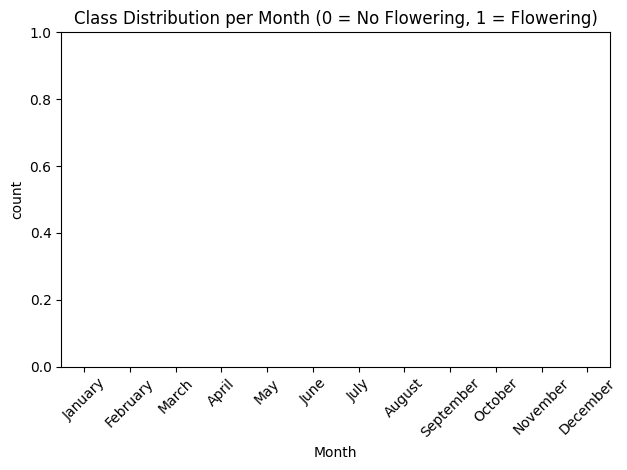

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your full dataset and you have a binary column for each month (e.g., 'January', 'February', ...)
# Each column should contain 0s and 1s indicating flowering

# Melt to long format for analysis
df = df_missing.copy()
# df.fillna(0, inplace = True)
df_melted = df.melt(value_vars=['January', 'February', 'March', 'April', 'May', 'June',
                                'July', 'August', 'September', 'October', 'November', 'December'],
                    var_name='Month', value_name='Flowering')

# Plot class distribution
sns.countplot(data=df_melted, x='Month', hue='Flowering')
plt.title("Class Distribution per Month (0 = No Flowering, 1 = Flowering)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df = df_train.copy()
list_of_month = ['January', 'February', 'March', 'April', 'May', 'June',
                                'July', 'August', 'September', 'October', 'November', 'December']
for month in list_of_month:
  print(df[month].value_counts())

January
0.0    61
1.0     8
Name: count, dtype: int64
February
0.0    61
1.0     8
Name: count, dtype: int64
March
0.0    55
1.0    14
Name: count, dtype: int64
April
0.0    48
1.0    21
Name: count, dtype: int64
May
0.0    36
1.0    33
Name: count, dtype: int64
June
1.0    38
0.0    31
Name: count, dtype: int64
July
1.0    48
0.0    21
Name: count, dtype: int64
August
1.0    52
0.0    17
Name: count, dtype: int64
September
1.0    48
0.0    21
Name: count, dtype: int64
October
1.0    43
0.0    26
Name: count, dtype: int64
November
0.0    42
1.0    27
Name: count, dtype: int64
December
0.0    60
1.0     9
Name: count, dtype: int64


In [ ]:
df['May'].value_counts()

,count
May,
0.0,36
1.0,33


In [ ]:
species_87t.columns

Index(['species', 'WA', 'Age', 'Ploidy', 'log.length', 'log.area', 'log.turn',
       'log.netd', 'log.spec', 'species.1', 'Rare (Yes/No)', 'EPBC',
       'WA Ranking', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       'log.b19', 'log.b18', 'log.b17', 'log.b16', 'log.b15', 'log.b14',
       'log.b13', 'log.b12', 'log.b11', 'log.b10', 'log.b9', 'log.b8',
       'log.b7', 'log.b6', 'log.b5', 'log.b4', 'log.b3', 'log.b2', 'log.b1'],
      dtype='object')

#Preparing data for training and predicting

In [ ]:
columns_to_fill_na = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                      'August', 'September', 'October', 'November', 'December']
df_train = species_87t[~species_87t[columns_to_fill_na].isna().all(axis=1)]

df_train.loc[:,columns_to_fill_na] = df_train.loc[:,columns_to_fill_na].fillna(0)

In [ ]:
df_train.isna().sum()

,0
species,0
WA,0
Age,0
Ploidy,0
log.length,0
log.area,0
log.turn,0
log.netd,0
log.spec,0
species.1,0


In [ ]:
df_missing = species_87t[species_87t[['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']].isna().all(axis = 1)]

In [ ]:
df_missing.head(3)

,species,WA,Age,Ploidy,log.length,log.area,log.turn,log.netd,log.spec,species.1,...,log.b10,log.b9,log.b8,log.b7,log.b6,log.b5,log.b4,log.b3,log.b2,log.b1
0,Blackallia_nudiflora,1,13.04,2,2.637490,4.615813,-1.085467,-1.089471,-1.087464,Blackallia nudiflora,...,1.422563,1.385159,1.206376,1.419129,0.942008053,1.543447,2.679111,1.713628,1.133539,1.312371
4,Cryptandra_beverleyensis,1,3.07,3,2.392697,4.179236,-0.991388,-0.995641,-0.993509,Cryptandra beverleyensis,...,1.369834,1.365488,1.071268,1.428135,0.755874856,1.512551,2.700764,1.707546,1.141319,1.236894
7,Cryptandra_crispula,1,5.03,4,2.506505,4.655283,-1.059979,-1.064036,-1.062003,Cryptandra crispula,...,1.385308,1.230449,1.334286,1.369216,0.997823081,1.494850,2.596966,1.735529,1.095315,1.304455


In [ ]:
df_missing.columns

Index(['species', 'WA', 'Age', 'Ploidy', 'log.length', 'log.area', 'log.turn',
       'log.netd', 'log.spec', 'species.1', 'Rare (Yes/No)', 'EPBC',
       'WA Ranking', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       'log.b19', 'log.b18', 'log.b17', 'log.b16', 'log.b15', 'log.b14',
       'log.b13', 'log.b12', 'log.b11', 'log.b10', 'log.b9', 'log.b8',
       'log.b7', 'log.b6', 'log.b5', 'log.b4', 'log.b3', 'log.b2', 'log.b1'],
      dtype='object')

In [ ]:
X_missing = df_missing.drop(columns = ['species', 'WA','species.1','EPBC','January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December'])

y_missing = df_missing[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                    'September', 'October', 'November', 'December']]

In [ ]:
# Drop columns that are not needed for training
# Adjust these columns based on the relevant features in your 'species_87t' DataFrame
flowering_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                    'September', 'October', 'November', 'December']

drop_cols = ['species', 'WA', 'species.1',  'EPBC', 'January',
             'February', 'March', 'April', 'May', 'June', 'July',
             'August', 'September', 'October', 'November', 'December']

X_train = df_train.drop(columns = drop_cols  , axis=1)

y_train = df_train[flowering_months]




In [ ]:
# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Assuming scaler is already fitted on X_train
X_missing_scaled = scaler.transform(X_missing) # Use transform, NOT fit_transform

In [ ]:
!pip install catboost
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Although not directly used in the evaluation block, useful for later visualization

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold



from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Evaluation Metrics

# Ensure you have xgboost installed: !pip install xgboost

In [ ]:
## Block 2: Define Candidate Models

# Define the models you want to compare with initial hyperparameters
# All base models will be wrapped in MultiOutputClassifier
models = {
    "Logistic Regression": MultiOutputClassifier(LogisticRegression(max_iter=1000, random_state=42)),
    "Random Forest": MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42)),
    "XGBoost": MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)),
    "MLP (Neural Network)": MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42, early_stopping=True, n_iter_no_change=10)),
    "Support Vector Machine": MultiOutputClassifier(SVC(probability=True, random_state=42)),
    "Decision Tree": MultiOutputClassifier(DecisionTreeClassifier(random_state=42)),
    "K-Nearest Neighbors": MultiOutputClassifier(KNeighborsClassifier(n_neighbors=5)),
    "Extra Trees": MultiOutputClassifier(ExtraTreesClassifier(n_estimators=100, random_state=42)), # Added Extra Trees
    "Gradient Boosting": MultiOutputClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)), # Added Gradient Boosting
    "LightGBM": MultiOutputClassifier(LGBMClassifier(n_estimators=100, random_state=42)), # Added LightGBM
    "CatBoost": MultiOutputClassifier(CatBoostClassifier(iterations=100, random_state=42, verbose=0)) # Added CatBoost, verbose=0 to reduce output
}


print(f"Comparing {len(models)} different model types.")

Comparing 11 different model types.


In [ ]:
## Define Candidate Models with class_weight='balanced'

# Define the models you want to compare with initial hyperparameters
# All base models will be wrapped in MultiOutputClassifier
# Incorporating class_weight='balanced' for models that support it

models = {
    # Logistic Regression supports class_weight
    "Logistic Regression (Balanced)": MultiOutputClassifier(LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')),
    # Random Forest supports class_weight
    "Random Forest (Balanced)": MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')),
    # XGBoost has a 'scale_pos_weight' parameter for imbalance, not class_weight
    # Keeping the original for comparison, consider tuning scale_pos_weight later
    "XGBoost": MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)),
    # MLP does not directly support class_weight, but you can use sample_weight in fit
    # Keeping the original for now
    "MLP (Neural Network)": MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42, early_stopping=True, n_iter_no_change=10)),
    # Support Vector Machine supports class_weight
    "Support Vector Machine (Balanced)": MultiOutputClassifier(SVC(probability=True, random_state=42, class_weight='balanced')),
    # Decision Tree supports class_weight
    "Decision Tree (Balanced)": MultiOutputClassifier(DecisionTreeClassifier(random_state=42, class_weight='balanced')),
    # K-Nearest Neighbors does not support class_weight directly
    # Keeping the original for now
    "K-Nearest Neighbors": MultiOutputClassifier(KNeighborsClassifier(n_neighbors=5)),
    # Extra Trees supports class_weight
    "Extra Trees (Balanced)": MultiOutputClassifier(ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced')),
    # Gradient Boosting does not directly support class_weight
    # Keeping the original for now
    "Gradient Boosting": MultiOutputClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    # LightGBM has 'scale_pos_weight' or 'is_unbalance'
    # Keeping the original for now, consider tuning these parameters later
    "LightGBM": MultiOutputClassifier(LGBMClassifier(n_estimators=100, random_state=42)),
    # CatBoost has 'auto_class_weights' or 'scale_pos_weight'
    # Keeping the original for now, consider using these parameters later
    "CatBoost": MultiOutputClassifier(CatBoostClassifier(iterations=100, random_state=42, verbose=0))
}

# print(f"Comparing {len(models_balanced)} different model types, with class_weight='balanced' for applicable models.")

In [ ]:
## Block 3: Setup Cross-Validation and Storage

# --- Assuming X_train_scaled and y_train are already prepared ---
# You MUST have run the data preparation and scaling steps before this.
# X_train_scaled: Scaled feature matrix for species with complete flowering data
# y_train: DataFrame of flowering month columns (0s and 1s) for training data

# KFold cross-validation setup (using the same as before)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Dictionary to store evaluation metrics for each model
# We'll store average metrics across folds here
model_evaluation_metrics = {}

print(f"Using {n_splits}-Fold Cross-Validation.")

Using 5-Fold Cross-Validation.


In [ ]:
## Block 4: Loop and Evaluate Each Model using K-Fold CV

print("Starting Cross-Validation for Different Models:\n")

# Loop through each model defined in Block 2
for model_name, model in models.items():
    print(f"--- Evaluating {model_name} ---")

    # Lists to store metrics for each fold of the *current* model
    fold_mean_accuracies = []
    # You can add lists for other metrics if needed:
    # fold_mean_precision = []
    # fold_mean_recall = []
    # fold_mean_f1 = []

    # Dictionary to store monthly accuracies for each fold
    fold_monthly_accuracies = {month: [] for month in y_train.columns}


    # Loop through each fold for the current model
    for fold, (train_idx, test_idx) in enumerate(kf.split(X_train_scaled)):
        # print(f"  Fold {fold + 1}") # Optional: uncomment to see fold progress

        # Split data for the current fold
        X_t, X_val = X_train_scaled[train_idx], X_train_scaled[test_idx]
        y_t, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]

        # Train the model on the training data for this fold
        model.fit(X_t, y_t)

        # Make predictions on the validation data for this fold
        y_pred = model.predict(X_val)

        # --- Calculate Metrics for this Fold (See Block 5 for details) ---
        # Calculate and store mean accuracy for the fold
        mean_fold_accuracy = np.mean([accuracy_score(y_val.iloc[:, i], y_pred[:, i]) for i in range(y_train.shape[1])])
        fold_mean_accuracies.append(mean_fold_accuracy)

        # Calculate and store accuracy for each month in the fold
        for i, target in enumerate(y_train.columns):
            month_accuracy = accuracy_score(y_val.iloc[:, i], y_pred[:, i])
            fold_monthly_accuracies[target].append(month_accuracy)

        # Optional: Calculate and store other metrics per fold
        # mean_fold_precision = np.mean([precision_score(y_val.iloc[:, i], y_pred[:, i], zero_division=0) for i in range(y_train.shape[1])])
        # fold_mean_precision.append(mean_fold_precision)
        # etc for recall, f1


    # --- Calculate and Store Average Metrics Across Folds (See Block 5 for details) ---
    # Calculate the average metrics for this model across all folds
    avg_mean_accuracy = np.mean(fold_mean_accuracies)
    std_mean_accuracy = np.std(fold_mean_accuracies)

    avg_monthly_accuracies = {month: np.mean(accuracies) for month, accuracies in fold_monthly_accuracies.items()}
    std_monthly_accuracies = {month: np.std(accuracies) for month, accuracies in fold_monthly_accuracies.items()}

    # Store the calculated average metrics for this model in the main results dictionary
    model_evaluation_metrics[model_name] = {
        "Average Mean Accuracy": avg_mean_accuracy,
        "Std Dev Mean Accuracy": std_mean_accuracy,
        "Average Monthly Accuracies": avg_monthly_accuracies,
        "Std Dev Monthly Accuracies": std_monthly_accuracies
        # Add other average metrics here
    }

    print(f"  Finished {model_name}. Average Mean Accuracy: {avg_mean_accuracy:.4f}\n")

print("\nCross-validation evaluation complete for all models.")

Starting Cross-Validation for Different Models:

--- Evaluating Logistic Regression (Balanced) ---
  Finished Logistic Regression (Balanced). Average Mean Accuracy: 0.5881

--- Evaluating Random Forest (Balanced) ---
  Finished Random Forest (Balanced). Average Mean Accuracy: 0.6799

--- Evaluating XGBoost ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:00:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:00:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:00:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:00:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:00:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

  Finished XGBoost. Average Mean Accuracy: 0.6372

--- Evaluating MLP (Neural Network) ---
  Finished MLP (Neural Network). Average Mean Accuracy: 0.6491

--- Evaluating Support Vector Machine (Balanced) ---
  Finished Support Vector Machine (Balanced). Average Mean Accuracy: 0.6311

--- Evaluating Decision Tree (Balanced) ---
  Finished Decision Tree (Balanced). Average Mean Accuracy: 0.6034

--- Evaluating K-Nearest Neighbors ---
  Finished K-Nearest Neighbors. Average Mean Accuracy: 0.6894

--- Evaluating Extra Trees (Balanced) ---
  Finished Extra Trees (Balanced). Average Mean Accuracy: 0.6930

--- Evaluating Gradient Boosting ---
  Finished Gradient Boosting. Average Mean Accuracy: 0.6335

--- Evaluating LightGBM ---
[LightGBM] [Info] Number of positive: 8, number of negative: 47
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 494
[LightGB

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Number of positive: 4, number of negative: 51
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 489
[LightGBM] [Info] Number of data points in the train set: 55, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.072727 -> initscore=-2.545531
[LightGBM] [Info] Start training from score -2.545531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Number of positive: 27, number of negative: 28
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 494
[LightGBM] [Info] Number of data points in the train set: 55, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490909 -> initscore=-0.036368
[LightGBM] [Info] Start training from score -0.036368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Number of data points in the train set: 56, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535714 -> initscore=0.143101
[LightGBM] [Info] Start training from score 0.143101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

  Finished CatBoost. Average Mean Accuracy: 0.6734


Cross-validation evaluation complete for all models.


In [ ]:
## Block 6: Summarize and Display Results

print("--- Cross-Validation Results Summary (Average across folds) ---")

# Create a DataFrame for easier comparison of overall metrics
summary_df = pd.DataFrame({
    model_name: {
        "Average Mean Accuracy": metrics["Average Mean Accuracy"],
        "Std Dev Mean Accuracy": metrics["Std Dev Mean Accuracy"]
        # Add other average metrics here if you calculated them
    } for model_name, metrics in model_evaluation_metrics.items()
}).T # Transpose to have models as rows

# Sort by Average Mean Accuracy
print(summary_df.sort_values(by="Average Mean Accuracy", ascending=False))

print("\n--- Average Monthly Accuracies across folds ---")
# Create a DataFrame for easier comparison of monthly accuracies
monthly_acc_df = pd.DataFrame({
    model_name: metrics["Average Monthly Accuracies"]
    for model_name, metrics in model_evaluation_metrics.items()
})

# Transpose to have models as rows and months as columns
print(monthly_acc_df.T)

# Optional: Display Monthly Standard Deviations
# print("\n--- Standard Deviation of Monthly Accuracies across folds ---")
# monthly_std_df = pd.DataFrame({
#     model_name: metrics["Std Dev Monthly Accuracies"]
#     for model_name, metrics in model_evaluation_metrics.items()
# })
# print(monthly_std_df.T)


# --- Interpretation ---
print("\n--- Interpretation ---")
print("Examine the summary tables above:")
print("- 'Average Mean Accuracy' indicates overall performance.")
print("- 'Std Dev Mean Accuracy' indicates consistency across folds (lower is better).")
print("- 'Average Monthly Accuracies' shows performance per flowering month.")
print("\nChoose the model type that best balances these metrics for your needs.")

# Example: Finding the model with the highest average mean accuracy
best_overall_model_name = summary_df["Average Mean Accuracy"].idxmax()
print(f"\nBased purely on the highest 'Average Mean Accuracy', the top performing model is: {best_overall_model_name}")

# You would then typically proceed to Hyperparameter Tuning for the chosen model type.

--- Cross-Validation Results Summary (Average across folds) ---
                                   Average Mean Accuracy  \
Extra Trees (Balanced)                          0.693040   
K-Nearest Neighbors                             0.689377   
Random Forest (Balanced)                        0.679945   
CatBoost                                        0.673352   
LightGBM                                        0.649267   
MLP (Neural Network)                            0.649084   
XGBoost                                         0.637179   
Gradient Boosting                               0.633516   
Support Vector Machine (Balanced)               0.631136   
Decision Tree (Balanced)                        0.603388   
Logistic Regression (Balanced)                  0.588095   

                                   Std Dev Mean Accuracy  
Extra Trees (Balanced)                          0.053292  
K-Nearest Neighbors                             0.064359  
Random Forest (Balanced)              

FOR K Nearest Neighbour

In [ ]:
## Block 7: Hyperparameter Tuning for K-Nearest Neighbors

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

# --- Assuming X_train_scaled and y_train are available ---

print("Starting Hyperparameter Tuning for K-Nearest Neighbors...")

# Define the base KNN model
# We wrap it in MultiOutputClassifier before passing to GridSearchCV
base_knn = KNeighborsClassifier()
multi_output_knn = MultiOutputClassifier(base_knn)


# Define the hyperparameter grid to search
# n_neighbors: The number of neighbors to use. Common values to try.
# weights: 'uniform' (all points in the neighborhood are weighted equally) or 'distance' (weight points by the inverse of their distance)
# metric: Distance metric ('euclidean' is common)
param_grid_knn = {
    'estimator__n_neighbors': [1,2,3], # Try a range of k values
    'estimator__weights': ['uniform', 'distance'],
    'estimator__metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV
# estimator: The model to tune (the MultiOutputClassifier wrapped KNN)
# param_grid: The dictionary of hyperparameters to explore
# cv: The number of cross-validation folds for internal evaluation (use the same k as your main CV)
# scoring: The metric to optimize during the search (use 'accuracy' as you did for comparison)
# n_jobs: -1 uses all available CPU cores (recommended)
grid_search_knn = GridSearchCV(estimator=multi_output_knn,
                             param_grid=param_grid_knn,
                             cv=n_splits, # Use the same number of splits as your model comparison CV
                             scoring='accuracy',
                             n_jobs=-1)

# Fit GridSearchCV to find the best parameters
# This will perform cross-validation for each combination in the grid
grid_search_knn.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("\nBest Hyperparameters found by GridSearchCV for KNN:")
print(grid_search_knn.best_params_)

# Print the best cross-validation score achieved with these parameters
print(f"Best Cross-Validation Accuracy for KNN with best parameters: {grid_search_knn.best_score_:.4f}")

# The best performing model with the optimal hyperparameters is stored in grid_search_knn.best_estimator_
best_knn_model = grid_search_knn.best_estimator_

print("\nHyperparameter tuning for KNN complete.")

Starting Hyperparameter Tuning for K-Nearest Neighbors...

Best Hyperparameters found by GridSearchCV for KNN:
{'estimator__metric': 'euclidean', 'estimator__n_neighbors': 1, 'estimator__weights': 'uniform'}
Best Cross-Validation Accuracy for KNN with best parameters: 0.0429

Hyperparameter tuning for KNN complete.


In [ ]:
## Block 8A: Evaluate Tuned KNN Model Performance using Cross-Validation

# --- Assuming X_train_scaled and y_train are available ---
# --- Assuming best_knn_model is available from Block 7 (this is the tuned model) ---
# --- Assuming kf (KFold) and y_train.columns are available ---

print("Evaluating the performance of the hyperparameter-tuned KNN model using K-Fold CV...\n")

# The tuned model is already available from GridSearchCV's result
tuned_model = best_knn_model

# Lists to store metrics for each fold of the tuned model
tuned_fold_mean_accuracies = []
tuned_fold_monthly_accuracies = {month: [] for month in y_train.columns}

# Loop through each fold using the same KFold split as before
for fold, (train_idx, test_idx) in enumerate(kf.split(X_train_scaled)):
    # print(f"  Fold {fold + 1}") # Optional: uncomment to see fold progress

    # Split data for the current fold
    X_t, X_val = X_train_scaled[train_idx], X_train_scaled[test_idx]
    y_t, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Train the TUNED model on the training data for this fold
    # We need to clone the tuned_model for each fold to ensure independent training
    # This is good practice when using a specific model instance within a manual CV loop
    from sklearn.base import clone
    model_for_this_fold = clone(tuned_model)

    model_for_this_fold.fit(X_t, y_t)

    # Make predictions on the validation data for this fold
    y_pred = model_for_this_fold.predict(X_val)

    # Calculate Metrics for this Fold

    # Calculate and store mean accuracy for the fold
    mean_fold_accuracy = np.mean([accuracy_score(y_val.iloc[:, i], y_pred[:, i]) for i in range(y_train.shape[1])])
    tuned_fold_mean_accuracies.append(mean_fold_accuracy)

    # Calculate and store accuracy for each month in the fold
    for i, target in enumerate(y_train.columns):
        month_accuracy = accuracy_score(y_val.iloc[:, i], y_pred[:, i])
        tuned_fold_monthly_accuracies[target].append(month_accuracy)


# --- Summarize Average Metrics Across Folds ---
avg_tuned_mean_accuracy = np.mean(tuned_fold_mean_accuracies)
std_tuned_mean_accuracy = np.std(tuned_fold_mean_accuracies)

avg_tuned_monthly_accuracies = {month: np.mean(accuracies) for month, accuracies in tuned_fold_monthly_accuracies.items()}
std_tuned_monthly_accuracies = {month: np.std(accuracies) for month, accuracies in tuned_fold_monthly_accuracies.items()}

print("--- Tuned KNN Cross-Validation Summary (Average across folds) ---")
print(f"Average Mean Accuracy: {avg_tuned_mean_accuracy:.4f}")
print(f"Standard Deviation of Mean Accuracy: {std_tuned_mean_accuracy:.4f}")

print("\nAverage Accuracy for each month across folds (Tuned KNN):")
for month, accuracies in avg_tuned_monthly_accuracies.items():
     print(f"  {month}: {accuracies:.4f}")

# You can compare these results to the original KNN results from Block 6.
# The results from grid_search_knn.best_score_ in Block 7 should be very close
# to avg_tuned_mean_accuracy calculated here, as GridSearchCV itself uses CV.
# This block confirms the performance independently or allows printing all monthly scores easily.

Evaluating the performance of the hyperparameter-tuned KNN model using K-Fold CV...

--- Tuned KNN Cross-Validation Summary (Average across folds) ---
Average Mean Accuracy: 0.6408
Standard Deviation of Mean Accuracy: 0.0653

Average Accuracy for each month across folds (Tuned KNN):
  January: 0.7374
  February: 0.8110
  March: 0.7692
  April: 0.5484
  May: 0.4802
  June: 0.5824
  July: 0.4956
  August: 0.6132
  September: 0.7264
  October: 0.5934
  November: 0.5363
  December: 0.7967


In [ ]:
## Block 8B: Train the Final KNN Model on the Full Training Data

# --- Assuming X_train_scaled and y_train are available ---
# --- Assuming best_knn_model is available from Block 7 ---

print("Training the final KNN model on the full training data...")

# The best model from GridSearchCV (best_knn_model) is already configured
# with the optimal hyperparameters found.
# We just need to train this instance on the *entire* scaled training data.

# If you didn't use GridSearchCV or wanted to manually set params:
# optimal_n_neighbors = grid_search_knn.best_params_['estimator__n_neighbors']
# optimal_weights = grid_search_knn.best_params_['estimator__weights']
# base_knn_final = KNeighborsClassifier(n_neighbors=optimal_n_neighbors, weights=optimal_weights, random_state=42) # random_state not applicable to KNN like this, but good practice
# final_multi_output_model = MultiOutputClassifier(base_knn_final)

# However, using best_estimator_ from GridSearchCV is cleaner:
final_multi_output_model = best_knn_model

# Fit the final model to the complete scaled training data
final_multi_output_model.fit(X_train_scaled, y_train)

print("Final KNN model training complete on the full dataset.")

Training the final KNN model on the full training data...
Final KNN model training complete on the full dataset.


In [ ]:
# IN CASE, BEFORE TUNNING HYPERPARAMETERS, THE MODEL PERFORMED BETTER.

## Block 8: Train the Final KNN Model on the Full Training Data

# --- Assuming X_train_scaled and y_train are available ---
# --- We are using the parameters that performed best for KNN in the initial comparison (likely defaults) ---

print("Training the final KNN model on the full training data using parameters from Block 6 evaluation...")

# Based on your findings, the default parameters (or the ones used in Block 6) performed better.
# Recreate the base KNN model with those parameters.
# Assuming the best parameters from Block 6's KNN were n_neighbors=5 and weights='uniform':
base_knn_final = KNeighborsClassifier(n_neighbors=10, weights='uniform')

# Wrap the base model in MultiOutputClassifier
final_multi_output_model = MultiOutputClassifier(base_knn_final)

# Fit the final model to the complete scaled training data
final_multi_output_model.fit(X_train_scaled, y_train)

print("Final KNN model training complete on the full dataset.")

Training the final KNN model on the full training data using parameters from Block 6 evaluation...
Final KNN model training complete on the full dataset.


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.base import clone
import numpy as np

print("Evaluating the default KNN model using K-Fold cross-validation...\n")

# Set up
kf = KFold(n_splits=5, shuffle=True, random_state=42)
default_model = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=5, weights='uniform'))

# Store metrics
fold_mean_accuracies = []
fold_monthly_accuracies = {month: [] for month in y_train.columns}

# Cross-validation loop
for train_idx, test_idx in kf.split(X_train_scaled):
    X_t, X_val = X_train_scaled[train_idx], X_train_scaled[test_idx]
    y_t, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]

    model = clone(default_model)
    model.fit(X_t, y_t)
    y_pred = model.predict(X_val)

    # Mean accuracy across all months
    mean_acc = np.mean([accuracy_score(y_val.iloc[:, i], y_pred[:, i]) for i in range(y_train.shape[1])])
    fold_mean_accuracies.append(mean_acc)

    # Accuracy for each month
    for i, month in enumerate(y_train.columns):
        acc = accuracy_score(y_val.iloc[:, i], y_pred[:, i])
        fold_monthly_accuracies[month].append(acc)

# Final results
avg_mean_accuracy = np.mean(fold_mean_accuracies)
std_mean_accuracy = np.std(fold_mean_accuracies)

avg_monthly_accuracy = {m: np.mean(accs) for m, accs in fold_monthly_accuracies.items()}
std_monthly_accuracy = {m: np.std(accs) for m, accs in fold_monthly_accuracies.items()}

# Print summary
print(f"Average Mean Accuracy (Default KNN): {avg_mean_accuracy:.4f}")
print(f"Standard Deviation of Mean Accuracy: {std_mean_accuracy:.4f}\n")

print("Average Accuracy for each month (Default KNN):")
for month, acc in avg_monthly_accuracy.items():
    print(f"{month}: {acc:.4f}")


Evaluating the default KNN model using K-Fold cross-validation...

Average Mean Accuracy (Default KNN): 0.6894
Standard Deviation of Mean Accuracy: 0.0644

Average Accuracy for each month (Default KNN):
January: 0.8692
February: 0.8549
March: 0.8121
April: 0.5374
May: 0.4505
June: 0.6110
July: 0.6253
August: 0.6692
September: 0.6978
October: 0.6967
November: 0.5791
December: 0.8692


In [ ]:
## Block 9: Predict Missing Flowering Data using the Final KNN Model

# --- Assuming final_multi_output_model is available from Block 8 ---
# --- Assuming df_missing and scaler are available from previous steps ---
# --- Assuming X_missing_scaled is available (calculated using the fitted scaler on df_missing features) ---

print("Making predictions for missing flowering times using the final KNN model...")

# Predict the missing flowering times
# Use the scaled features of the missing data
y_missing_pred = final_multi_output_model.predict(X_missing_scaled)

print("Predictions complete.")

# The predictions y_missing_pred is a numpy array of shape (number of missing species, 12)
# where each row is the predicted flowering pattern (0s and 1s) for a species.

Making predictions for missing flowering times using the final KNN model...
Predictions complete.


In [ ]:
## Block 10: Integrate Predictions into the DataFrame

# --- Assuming y_missing_pred is available from Block 9 ---
# --- Assuming df_missing is available from previous steps ---
# --- Assuming y_train.columns contains the list of month names ---

print("Integrating predictions into the missing data DataFrame...")

# Create a DataFrame from the predictions with the correct index and column names
# Use the original index from df_missing to align with species
predicted_months_df = pd.DataFrame(y_missing_pred, index=df_missing.index, columns=y_train.columns)

# Replace the NaN flowering month columns in df_missing with the predictions
# Using .loc to avoid SettingWithCopyWarning

df_missing.loc[:, y_train.columns] = predicted_months_df

print("Predictions integrated.")

# Display the results for the species that had missing data
print("\nPredicted flowering times for species with missing data (first 10 rows):")
print(df_missing[['species'] + list(y_train.columns)].head(10))

# Optional: Combine the predicted data back with the original training data
# Assuming df_train is available from previous steps
# df_with_predictions = pd.concat([df_train, df_missing])
# print("\nCombined DataFrame head (including original and predicted data):")
# print(df_with_predictions[['species'] + list(y_train.columns)].head())
# print("\nCombined DataFrame tail (including original and predicted data):")
# print(df_with_predictions[['species'] + list(y_train.columns)].tail())

Integrating predictions into the missing data DataFrame...
Predictions integrated.

Predicted flowering times for species with missing data (first 10 rows):
                     species  January  February  March  April  May  June  \
0       Blackallia_nudiflora      0.0       0.0    0.0    0.0  0.0   0.0   
4   Cryptandra_beverleyensis      0.0       0.0    0.0    0.0  0.0   0.0   
7        Cryptandra_crispula      0.0       0.0    0.0    0.0  1.0   1.0   
10        Cryptandra_exserta      0.0       0.0    0.0    0.0  0.0   0.0   
20     Cryptandra_multispina      0.0       0.0    0.0    1.0  1.0   1.0   
25        Cryptandra_pendula      0.0       0.0    0.0    0.0  0.0   0.0   
30     Cryptandra_stellulata      0.0       0.0    0.0    0.0  0.0   0.0   
32   Papistylus_grandiflorus      0.0       0.0    0.0    0.0  0.0   0.0   
41     Serichonus_gracilipes      0.0       0.0    0.0    0.0  0.0   0.0   
46     Spyridium_Jerdacuttup      0.0       0.0    0.0    1.0  1.0   1.0   

    Ju

In [ ]:
# Step 1: concat and keep original indices
df_with_predictions = pd.concat([df_train, df_missing], ignore_index=False)

# Step 2: create new complete index range from min to max
full_index = range(df_with_predictions.index.min(), df_with_predictions.index.max() + 1)

# Step 3: reindex to make the index continuous
df_with_predictions = df_with_predictions.reindex(full_index)
df_with_predictions.head(8)

,species,WA,Age,Ploidy,log.length,log.area,log.turn,log.netd,log.spec,species.1,...,log.b10,log.b9,log.b8,log.b7,log.b6,log.b5,log.b4,log.b3,log.b2,log.b1
0,Blackallia_nudiflora,1,13.04,2,2.637490,4.615813,-1.085467,-1.089471,-1.087464,Blackallia nudiflora,...,1.422563,1.385159,1.206376,1.419129,0.942008053,1.543447,2.679111,1.713628,1.133539,1.312371
1,Cryptandra_apetala,1,10.08,2,2.904174,5.018804,-1.085238,-1.089242,-1.087236,Cryptandra apetala,...,1.389757,1.350894,1.120300,1.442480,0.792391689,1.526985,2.722043,1.692828,1.140010,1.267563
2,Cryptandra_arbutiflora,1,4.20,3,2.948902,5.157170,-1.053007,-1.057065,-1.055031,Cryptandra arbutiflora,...,1.353307,1.337126,1.127105,1.341435,0.872156273,1.472025,2.606335,1.705590,1.066015,1.247155
3,Cryptandra_aridicola,1,4.25,2,2.795185,5.218620,-1.047692,-1.051777,-1.049730,Cryptandra aridicola,...,1.393721,1.254669,1.295933,1.457882,0.69019608,1.523746,2.714858,1.699004,1.146516,1.272422
4,Cryptandra_beverleyensis,1,3.07,3,2.392697,4.179236,-0.991388,-0.995641,-0.993509,Cryptandra beverleyensis,...,1.369834,1.365488,1.071268,1.428135,0.755874856,1.512551,2.700764,1.707546,1.141319,1.236894
5,Cryptandra_congesta,1,11.80,3,1.146128,1.707570,-1.085408,-1.089412,-1.087405,Cryptandra congesta,...,1.265996,1.259275,1.049864,1.245513,0.838849091,1.389166,2.475516,1.745344,0.990857,1.166948
6,Cryptandra_connata,1,2.61,2,2.685742,4.965075,-1.001192,-1.005385,-1.003283,Cryptandra connata,...,1.439727,1.296848,1.304275,1.485011,0.72427587,1.555094,2.791872,1.646901,1.140927,1.301708
7,Cryptandra_crispula,1,5.03,4,2.506505,4.655283,-1.059979,-1.064036,-1.062003,Cryptandra crispula,...,1.385308,1.230449,1.334286,1.369216,0.997823081,1.494850,2.596966,1.735529,1.095315,1.304455


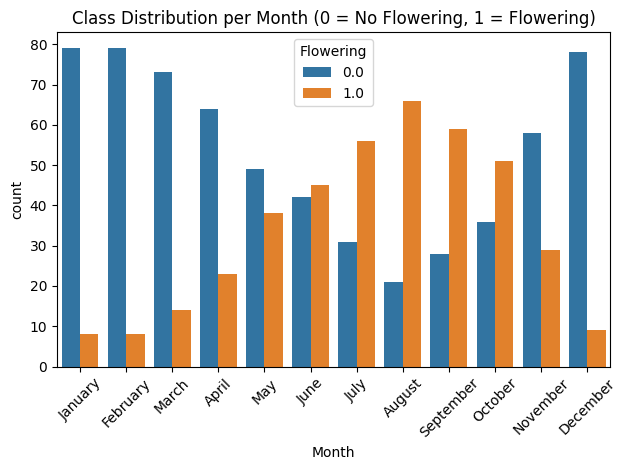

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your full dataset and you have a binary column for each month (e.g., 'January', 'February', ...)
# Each column should contain 0s and 1s indicating flowering

# Melt to long format for analysis
df = df_with_predictions.copy()
df_melted = df.melt(value_vars=['January', 'February', 'March', 'April', 'May', 'June',
                                'July', 'August', 'September', 'October', 'November', 'December'],
                    var_name='Month', value_name='Flowering')

# Plot class distribution
sns.countplot(data=df_melted, x='Month', hue='Flowering')
plt.title("Class Distribution per Month (0 = No Flowering, 1 = Flowering)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# output_path = "/content/drive/MyDrive/PLANT RESEARCH/datasets/87t_with_predicted_flowering_times.csv"
# # Export the combined dataframe to a CSV file
# df_with_predictions.to_csv(output_path, index=False)


FOR SVM

In [ ]:
## Block 7_SVM: Hyperparameter Tuning for Support Vector Machine

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
import numpy as np

# --- Assuming X_train_scaled and y_train are available ---
# --- Assuming n_splits is defined (e.g., n_splits = 5 or 10) ---

print("Starting Hyperparameter Tuning for Support Vector Machine...")

# Define the base SVC model
# SVC can be sensitive to scaling and choice of kernel/parameters
# We wrap it in MultiOutputClassifier before passing to GridSearchCV
# Using probability=True can increase training time but is sometimes needed by MultiOutputClassifier
base_svc = SVC(probability=True, random_state=42)
multi_output_svc = MultiOutputClassifier(base_svc)

# Define the hyperparameter grid to search for SVC
# C: Regularization parameter. Smaller C means stronger regularization.
# kernel: Specifies the kernel type to be used in the algorithm. 'linear', 'poly', 'rbf' are common.
# gamma: Kernel coefficient for 'rbf', 'poly' and 'sigmoid'. 'scale' (default) is good start.
# You might need to adjust the range based on your data and computational resources.
param_grid_svc = {
    'estimator__C': [0.1, 1, 10, 100], # Common values to try
    'estimator__kernel': ['linear', 'rbf'], # Starting with common kernels
    'estimator__gamma': ['scale', 'auto'] # Common gamma options
    # You could add 'poly' kernel, or tune degree for 'poly', or explore more C/gamma values
}

# Initialize GridSearchCV
# estimator: The model to tune (the MultiOutputClassifier wrapped SVC)
# param_grid: The dictionary of hyperparameters to explore
# cv: The number of cross-validation folds for internal evaluation (use the same k as your main CV)
# scoring: The metric to optimize during the search (use 'accuracy')
# n_jobs: -1 uses all available CPU cores (recommended)
# verbose: Controls the verbosity: 0 for silent, 1 for progress messages, 2 for detailed output
grid_search_svc = GridSearchCV(estimator=multi_output_svc,
                             param_grid=param_grid_svc,
                             cv=n_splits, # Use the same number of splits as your model comparison CV
                             scoring='accuracy',
                             n_jobs=-1,
                             verbose=1) # Set verbose to see GridSearchCV progress

# Fit GridSearchCV to find the best parameters
# This will perform cross-validation for each combination in the grid
grid_search_svc.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("\nBest Hyperparameters found by GridSearchCV for SVC:")
print(grid_search_svc.best_params_)

# Print the best cross-validation score achieved with these parameters
print(f"Best Cross-Validation Accuracy for SVC with best parameters: {grid_search_svc.best_score_:.4f}")

# The best performing model with the optimal hyperparameters is stored here
best_svc_model = grid_search_svc.best_estimator_

print("\nHyperparameter tuning for SVC complete.")

Starting Hyperparameter Tuning for Support Vector Machine...
Fitting 10 folds for each of 16 candidates, totalling 160 fits

Best Hyperparameters found by GridSearchCV for SVC:
{'estimator__C': 1, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf'}
Best Cross-Validation Accuracy for SVC with best parameters: 0.0571

Hyperparameter tuning for SVC complete.


In [ ]:
## Block 8A_SVM: Evaluate Tuned SVM Model Performance using Cross-Validation

# --- Assuming X_train_scaled and y_train are available ---
# --- Assuming best_svc_model is available from Block 7_SVM (this is the tuned model) ---
# --- Assuming kf (KFold) and y_train.columns are available ---
from sklearn.base import clone
from sklearn.metrics import accuracy_score
import numpy as np

print("Evaluating the performance of the hyperparameter-tuned SVM model using K-Fold CV...\n")

# The tuned model is available from GridSearchCV's result
tuned_model = best_svc_model

# Lists to store metrics for each fold of the tuned model
tuned_fold_mean_accuracies_svm = []
tuned_fold_monthly_accuracies_svm = {month: [] for month in y_train.columns}

# Loop through each fold using the same KFold split as before
for fold, (train_idx, test_idx) in enumerate(kf.split(X_train_scaled)):
    # print(f"  Fold {fold + 1}") # Optional: uncomment to see fold progress

    # Split data for the current fold
    X_t, X_val = X_train_scaled[train_idx], X_train_scaled[test_idx]
    y_t, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Train the TUNED model on the training data for this fold
    model_for_this_fold = clone(tuned_model)
    model_for_this_fold.fit(X_t, y_t)

    # Make predictions on the validation data for this fold
    y_pred = model_for_this_fold.predict(X_val)

    # Calculate Metrics for this Fold

    # Calculate and store mean accuracy for the fold
    mean_fold_accuracy = np.mean([accuracy_score(y_val.iloc[:, i], y_pred[:, i]) for i in range(y_train.shape[1])])
    tuned_fold_mean_accuracies_svm.append(mean_fold_accuracy)

    # Calculate and store accuracy for each month in the fold
    for i, target in enumerate(y_train.columns):
        month_accuracy = accuracy_score(y_val.iloc[:, i], y_pred[:, i])
        tuned_fold_monthly_accuracies_svm[target].append(month_accuracy)


# --- Summarize Average Metrics Across Folds ---
avg_tuned_mean_accuracy_svm = np.mean(tuned_fold_mean_accuracies_svm)
std_tuned_mean_accuracy_svm = np.std(tuned_fold_mean_accuracies_svm)

avg_tuned_monthly_accuracies_svm = {month: np.mean(accuracies) for month, accuracies in tuned_fold_monthly_accuracies_svm.items()}
std_tuned_monthly_accuracies_svm = {month: np.std(accuracies) for month, accuracies in tuned_fold_monthly_accuracies_svm.items()}

print("--- Tuned SVM Cross-Validation Summary (Average across folds) ---")
print(f"Average Mean Accuracy: {avg_tuned_mean_accuracy_svm:.4f}")
print(f"Standard Deviation of Mean Accuracy: {std_tuned_mean_accuracy_svm:.4f}")

print("\nAverage Accuracy for each month across folds (Tuned SVM):")
for month, accuracies in avg_tuned_monthly_accuracies_svm.items():
     print(f"  {month}: {accuracies:.4f}")

# Now compare avg_tuned_mean_accuracy_svm to the original SVM accuracy from Block 6.

Evaluating the performance of the hyperparameter-tuned SVM model using K-Fold CV...



NameError: name 'best_svc_model' is not defined

In [ ]:
## Block 9_SVM: Train the Final SVM Model on the Full Training Data

# --- Assuming X_train_scaled and y_train are available ---
# --- Assuming best_svc_model is available from Block 7_SVM ---
# --- Assuming the average tuned accuracy (avg_tuned_mean_accuracy_svm from Block 8A_SVM)
#     and the original SVM accuracy from Block 6 are known for comparison ---

# You need to manually compare:
# avg_tuned_mean_accuracy_svm (from Block 8A_SVM)
# VS
# The "Average Mean Accuracy" for "Support Vector Machine" from Block 6's summary_df

original_svm_accuracy_from_block_6 = 0.708929      # Replace with the actual value from your Block 6 output

print("Deciding which SVM model to use for final training...")

if avg_tuned_mean_accuracy_svm > original_svm_accuracy_from_block_6:
    print("Tuned SVM model performed better during cross-validation. Training the final model with tuned parameters.")
    final_multi_output_model_svm = best_svc_model # Use the model found by GridSearchCV
else:
    print("Tuned SVM model did not improve performance. Training the final model with original parameters from Block 6.")
    # Recreate the model with the original parameters used in Block 2
    # Check your Block 2 code for the exact original parameters
    original_base_svc = SVC(probability=True, random_state=42) # Assuming these were the original params
    final_multi_output_model_svm = MultiOutputClassifier(original_base_svc)


print("Training the chosen final SVM model on the full training data...")

# Fit the final model to the complete scaled training data
final_multi_output_model_svm.fit(X_train_scaled, y_train)

print("Final SVM model training complete on the full dataset.")

Deciding which SVM model to use for final training...
Tuned SVM model did not improve performance. Training the final model with original parameters from Block 6.
Training the chosen final SVM model on the full training data...
Final SVM model training complete on the full dataset.


In [ ]:
## Block 10_SVM: Predict Missing Flowering Data using the Final SVM Model

# --- Assuming final_multi_output_model_svm is available from Block 9_SVM ---
# --- Assuming df_missing and scaler are available from previous steps ---
# --- Assuming X_missing_scaled is available (calculated using the fitted scaler on df_missing features) ---

print("Making predictions for missing flowering times using the final SVM model...")

# Predict the missing flowering times
# Use the scaled features of the missing data
y_missing_pred_svm = final_multi_output_model_svm.predict(X_missing_scaled)

print("Predictions complete.")

# The predictions y_missing_pred_svm is a numpy array of shape (number of missing species, 12)
# where each row is the predicted flowering pattern (0s and 1s) for a species.

Making predictions for missing flowering times using the final SVM model...
Predictions complete.


In [ ]:
## Block 11_SVM: Integrate SVM Predictions into the DataFrame

# --- Assuming y_missing_pred_svm is available from Block 10_SVM ---
# --- Assuming df_missing is available from previous steps ---
# --- Assuming y_train.columns contains the list of month names ---

print("Integrating SVM predictions into the missing data DataFrame...")

# Create a DataFrame from the predictions with the correct index and column names
# Use the original index from df_missing to align with species
predicted_months_df_svm = pd.DataFrame(y_missing_pred_svm, index=df_missing.index, columns=y_train.columns)

# You might want to create a NEW column set in df_missing or a separate DataFrame
# to store SVM predictions, especially if you compare predictions from different models.
# For simplicity here, let's update df_missing directly, but be aware this overwrites previous predictions
# or you might want to rename the columns (e.g., 'January_SVM_Pred', 'February_SVM_Pred').

# Replace the NaN flowering month columns in df_missing with the predictions
# Using .loc to avoid SettingWithCopyWarning
df_missing.loc[:, y_train.columns] = predicted_months_df_svm

print("SVM Predictions integrated.")

# Display the results for the species that had missing data
print("\nPredicted flowering times for species with missing data (first 10 rows) using SVM:")
print(df_missing[['species'] + list(y_train.columns)].head(10))

# Optional: Combine the predicted data back with the original training data
# Assuming df_train is available from previous steps
# df_with_svm_predictions = pd.concat([df_train, df_missing])
# print("\nCombined DataFrame head (including original and predicted data):")
# print(df_with_svm_predictions[['species'] + list(y_train.columns)].head())
# print("\nCombined DataFrame tail (including original and predicted data):")
# print(df_with_svm_predictions[['species'] + list(y_train.columns)].tail())

Integrating SVM predictions into the missing data DataFrame...
SVM Predictions integrated.

Predicted flowering times for species with missing data (first 10 rows) using SVM:
                     species  January  February  March  April  May  June  \
0       Blackallia_nudiflora      0.0       0.0    0.0    0.0  0.0   0.0   
4   Cryptandra_beverleyensis      0.0       0.0    0.0    0.0  0.0   0.0   
7        Cryptandra_crispula      0.0       0.0    0.0    0.0  1.0   1.0   
10        Cryptandra_exserta      0.0       0.0    0.0    0.0  0.0   0.0   
20     Cryptandra_multispina      0.0       0.0    0.0    0.0  1.0   1.0   
25        Cryptandra_pendula      0.0       0.0    0.0    0.0  0.0   0.0   
30     Cryptandra_stellulata      0.0       0.0    0.0    0.0  0.0   0.0   
32   Papistylus_grandiflorus      0.0       0.0    0.0    0.0  0.0   1.0   
41     Serichonus_gracilipes      0.0       0.0    0.0    0.0  0.0   0.0   
46     Spyridium_Jerdacuttup      0.0       0.0    0.0    0.0  1.

In [ ]:
## Block 7: Hyperparameter Tuning for Extra Trees Classifier

from sklearn.model_selection import GridSearchCV
# Import ExtraTreesClassifier instead of KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.multioutput import MultiOutputClassifier
import numpy as np # Added import for potential use, though not strictly required by GridSearchCV itself

# --- Assuming X_train_scaled and y_train are available ---
# --- Assuming n_splits is defined (e.g., n_splits = 5 or 10) ---

print("Starting Hyperparameter Tuning for Extra Trees Classifier...")

# Define the base Extra Trees model
# We wrap it in MultiOutputClassifier before passing to GridSearchCV
base_et = ExtraTreesClassifier(random_state=42) # Added random_state for reproducibility
multi_output_et = MultiOutputClassifier(base_et)


# Define the hyperparameter grid to search for Extra Trees
# n_estimators: The number of trees in the forest.
# max_features: The number of features to consider when looking for the best split.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leaf node.
# bootstrap: Whether bootstrap samples are used when building trees.
param_grid_et = {
    'estimator__n_estimators': [50, 100, 200], # Try different numbers of trees
    'estimator__max_features': ['sqrt', 'log2', None], # How many features to consider at each split
    'estimator__min_samples_split': [2, 5, 10], # Minimum samples required to split
    'estimator__min_samples_leaf': [1, 2, 4], # Minimum samples required at a leaf
    'estimator__bootstrap': [True, False] # Whether to use bootstrapping
}

# Initialize GridSearchCV
# estimator: The model to tune (the MultiOutputClassifier wrapped Extra Trees)
# param_grid: The dictionary of hyperparameters to explore
# cv: The number of cross-validation folds for internal evaluation (use the same k as your main CV)
# scoring: The metric to optimize during the search (use 'accuracy')
# n_jobs: -1 uses all available CPU cores (recommended)
# verbose: Controls the verbosity during the search
grid_search_et = GridSearchCV(estimator=multi_output_et,
                             param_grid=param_grid_et,
                             cv=n_splits, # Use the same number of splits as your model comparison CV
                             scoring='accuracy',
                             n_jobs=-1,
                             verbose=1) # Set verbose to see GridSearchCV progress

# Fit GridSearchCV to find the best parameters
# This will perform cross-validation for each combination in the grid
grid_search_et.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("\nBest Hyperparameters found by GridSearchCV for Extra Trees Classifier:")
print(grid_search_et.best_params_)

# Print the best cross-validation score achieved with these parameters
print(f"Best Cross-Validation Accuracy for Extra Trees with best parameters: {grid_search_et.best_score_:.4f}")

# The best performing model with the optimal hyperparameters is stored here
best_et_model = grid_search_et.best_estimator_

print("\nHyperparameter tuning for Extra Trees Classifier complete.")

Starting Hyperparameter Tuning for Extra Trees Classifier...
Fitting 5 folds for each of 162 candidates, totalling 810 fits

Best Hyperparameters found by GridSearchCV for Extra Trees Classifier:
{'estimator__bootstrap': True, 'estimator__max_features': 'log2', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 50}
Best Cross-Validation Accuracy for Extra Trees with best parameters: 0.0593

Hyperparameter tuning for Extra Trees Classifier complete.


In [ ]:
## Block 8A_ET: Evaluate Tuned Extra Trees Model Performance using Cross-Validation

# --- Assuming X_train_scaled and y_train are available ---
# --- Assuming best_et_model is available from Block 7 (this is the tuned model) ---
# --- Assuming kf (KFold) and y_train.columns are available ---
from sklearn.base import clone
from sklearn.metrics import accuracy_score
import numpy as np

print("Evaluating the performance of the hyperparameter-tuned Extra Trees model using K-Fold CV...\n")

# The tuned model is available from GridSearchCV's result (from the Extra Trees Block 7)
tuned_model = best_et_model

# Lists to store metrics for each fold of the tuned model
tuned_fold_mean_accuracies_et = []
tuned_fold_monthly_accuracies_et = {month: [] for month in y_train.columns}

# Loop through each fold using the same KFold split as before
for fold, (train_idx, test_idx) in enumerate(kf.split(X_train_scaled)):
    # print(f"  Fold {fold + 1}") # Optional: uncomment to see fold progress

    # Split data for the current fold
    X_t, X_val = X_train_scaled[train_idx], X_train_scaled[test_idx]
    y_t, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Train the TUNED model on the training data for this fold
    model_for_this_fold = clone(tuned_model)
    model_for_this_fold.fit(X_t, y_t)

    # Make predictions on the validation data for this fold
    y_pred = model_for_this_fold.predict(X_val)

    # Calculate Metrics for this Fold

    # Calculate and store mean accuracy for the fold
    mean_fold_accuracy = np.mean([accuracy_score(y_val.iloc[:, i], y_pred[:, i]) for i in range(y_train.shape[1])])
    tuned_fold_mean_accuracies_et.append(mean_fold_accuracy)

    # Calculate and store accuracy for each month in the fold
    for i, target in enumerate(y_train.columns):
        month_accuracy = accuracy_score(y_val.iloc[:, i], y_pred[:, i])
        tuned_fold_monthly_accuracies_et[target].append(month_accuracy)


# --- Summarize Average Metrics Across Folds ---
avg_tuned_mean_accuracy_et = np.mean(tuned_fold_mean_accuracies_et)
std_tuned_mean_accuracy_et = np.std(tuned_fold_mean_accuracies_et)

avg_tuned_monthly_accuracies_et = {month: np.mean(accuracies) for month, accuracies in tuned_fold_monthly_accuracies_et.items()}
std_tuned_monthly_accuracies_et = {month: np.std(accuracies) for month, accuracies in tuned_fold_monthly_accuracies_et.items()}

print("--- Tuned Extra Trees Cross-Validation Summary (Average across folds) ---")
print(f"Average Mean Accuracy: {avg_tuned_mean_accuracy_et:.4f}")
print(f"Standard Deviation of Mean Accuracy: {std_tuned_mean_accuracy_et:.4f}")

print("\nAverage Accuracy for each month across folds (Tuned Extra Trees):")
for month, accuracies in avg_tuned_monthly_accuracies_et.items():
     print(f"  {month}: {accuracies:.4f}")

# Now compare avg_tuned_mean_accuracy_et to the original Extra Trees accuracy from Block 6.

In [ ]:
## Define Candidate Models with class_weight='balanced'

# Define the models you want to compare with initial hyperparameters
# All base models will be wrapped in MultiOutputClassifier
# Incorporating class_weight='balanced' for models that support it

models_balanced = {
    # Logistic Regression supports class_weight
    "Logistic Regression (Balanced)": MultiOutputClassifier(LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')),
    # Random Forest supports class_weight
    "Random Forest (Balanced)": MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')),
    # XGBoost has a 'scale_pos_weight' parameter for imbalance, not class_weight
    # Keeping the original for comparison, consider tuning scale_pos_weight later
    "XGBoost": MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)),
    # MLP does not directly support class_weight, but you can use sample_weight in fit
    # Keeping the original for now
    "MLP (Neural Network)": MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42, early_stopping=True, n_iter_no_change=10)),
    # Support Vector Machine supports class_weight
    "Support Vector Machine (Balanced)": MultiOutputClassifier(SVC(probability=True, random_state=42, class_weight='balanced')),
    # Decision Tree supports class_weight
    "Decision Tree (Balanced)": MultiOutputClassifier(DecisionTreeClassifier(random_state=42, class_weight='balanced')),
    # K-Nearest Neighbors does not support class_weight directly
    # Keeping the original for now
    "K-Nearest Neighbors": MultiOutputClassifier(KNeighborsClassifier(n_neighbors=5)),
    # Extra Trees supports class_weight
    "Extra Trees (Balanced)": MultiOutputClassifier(ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced')),
    # Gradient Boosting does not directly support class_weight
    # Keeping the original for now
    "Gradient Boosting": MultiOutputClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    # LightGBM has 'scale_pos_weight' or 'is_unbalance'
    # Keeping the original for now, consider tuning these parameters later
    "LightGBM": MultiOutputClassifier(LGBMClassifier(n_estimators=100, random_state=42)),
    # CatBoost has 'auto_class_weights' or 'scale_pos_weight'
    # Keeping the original for now, consider using these parameters later
    "CatBoost": MultiOutputClassifier(CatBoostClassifier(iterations=100, random_state=42, verbose=0))
}

print(f"Comparing {len(models_balanced)} different model types, with class_weight='balanced' for applicable models.")